<a href="https://colab.research.google.com/github/ZdzislawJanczak/Load-data/blob/main/Pomiary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Load Data

In [2]:
# @title
common_path = '/content/drive/MyDrive/Colab Notebooks/raw/'
akg_df = pd.read_csv(common_path + 'AKG_1-200k.csv', usecols=[0, 1, 3], names=['Frequency', 'Amplitude', 'Phase'])
edifier_df = pd.read_csv(common_path + 'Edifier_1-200k.csv', usecols=[0, 1, 3], names=['Frequency', 'Amplitude', 'Phase'])
ol_df = pd.read_csv(common_path + 'OL_1-200k.csv', usecols=[0, 1, 3], names=['Frequency', 'Amplitude', 'Phase'])
sony_df = pd.read_csv(common_path + 'Sony_1-200k.csv', usecols=[0, 1, 3], names=['Frequency', 'Amplitude', 'Phase'])

In [3]:
# @title
# Define x-axis scale and ticks
# Options: 'custom_log', 'log10'
x_scale_type = 'custom_log'

if x_scale_type == 'custom_log':
    # Define the frequency intervals and steps for custom ticks
    freq_intervals = [(1, 10, 1), (10, 100, 10), (100, 1000, 100), (1000, 10000, 1000), (10000, 100000, 10000), (100000, 200000, 100000)]
    freq_ticks = []
    for start, end, step in freq_intervals:
        freq_ticks.extend(np.arange(start, end + step, step))
    freq_ticks = sorted(list(set(freq_ticks)))
    x_ticks = freq_ticks
    x_tick_labels = [str(int(tick)) for tick in freq_ticks]
    x_scale = 'log'
elif x_scale_type == 'log10':
    x_scale = 'log'
    x_ticks = None # Matplotlib will automatically determine ticks for log10
    x_tick_labels = None

In [4]:
# @title
def plot_single_metric(frequency_data, data_series_list, labels, title, ylabel, y_lim=None, y_ticks=None):
    """
    Generates a single plot for multiple data series against frequency.

    Args:
        frequency_data (pandas Series): A pandas Series representing the frequency data.
        data_series_list (list): A list of pandas Series to plot (e.g., [df1['Amplitude'], df2['Amplitude']]).
                                 Assumes the corresponding frequency data is available in the original dataframes
                                 or passed implicitly. For this specific dataset, we will assume the frequency
                                 data is the same for all series and can be accessed from one of the original dataframes.
        labels (list): A list of strings for the legend labels, corresponding to data_series_list.
        title (str): The title of the plot.
        ylabel (str): The label for the y-axis.
        y_lim (tuple, optional): A tuple (ymin, ymax) to set the y-axis limits. Defaults to None.
        y_ticks (list or numpy array, optional): A list or array of y-axis tick locations. Defaults to None.
    """
    plt.figure(figsize=(20, 6))
    for i, series in enumerate(data_series_list):
        plt.plot(frequency_data, series.values, label=labels[i])


    plt.xscale(x_scale)
    if x_ticks is not None:
        plt.xticks(x_ticks, x_tick_labels, rotation='vertical')

    plt.xlabel('Frequency (Hz)')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)

    if y_lim:
        plt.ylim(y_lim)
    if y_ticks is not None:
         plt.yticks(y_ticks)

    plt.show()


In [5]:
# @title
def plot_difference_metrics(frequency_data, amp_diff_series_list, phase_diff_series_list, labels, title_prefix, y_amp_label, y_phase_label):
    """
    Generates subplots for amplitude and phase differences against frequency.

    Args:
        frequency_data (pandas Series): A pandas Series representing the frequency data.
        amp_diff_series_list (list): A list of pandas Series for amplitude differences.
        phase_diff_series_list (list): A list of pandas Series for phase differences.
        labels (list): A list of strings for the legend labels, corresponding to the series lists.
        title_prefix (str): A prefix for the main title of the figure.
        y_amp_label (str): The label for the amplitude difference y-axis.
        y_phase_label (str): The label for the phase difference y-axis.
    """
    plt.figure(figsize=(20, 10)) # Consistent figure size, similar to the original difference plot

    # Amplitude Difference Plot (Top Subplot)
    plt.subplot(2, 1, 1) # 2 rows, 1 column, first plot
    for i, series in enumerate(amp_diff_series_list):
        plt.plot(frequency_data, series.values, label=labels[i])

    plt.xscale(x_scale)
    if x_ticks is not None:
        plt.xticks(x_ticks, x_tick_labels, rotation='vertical')

    plt.xlabel('Frequency (Hz)')
    plt.ylabel(y_amp_label)
    plt.title(f'{title_prefix} - Amplitude Difference')
    plt.legend()
    plt.grid(True)

    # Phase Difference Plot (Bottom Subplot)
    plt.subplot(2, 1, 2) # 2 rows, 1 column, second plot
    for i, series in enumerate(phase_diff_series_list):
        plt.plot(frequency_data, series.values, label=labels[i])

    plt.xscale(x_scale)
    if x_ticks is not None:
        plt.xticks(x_ticks, x_tick_labels, rotation='vertical')

    plt.xlabel('Frequency (Hz)')
    plt.ylabel(y_phase_label)
    plt.title(f'{title_prefix} - Phase Difference') # Add specific title for phase difference
    plt.legend()
    plt.grid(True)

    plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
    plt.show()


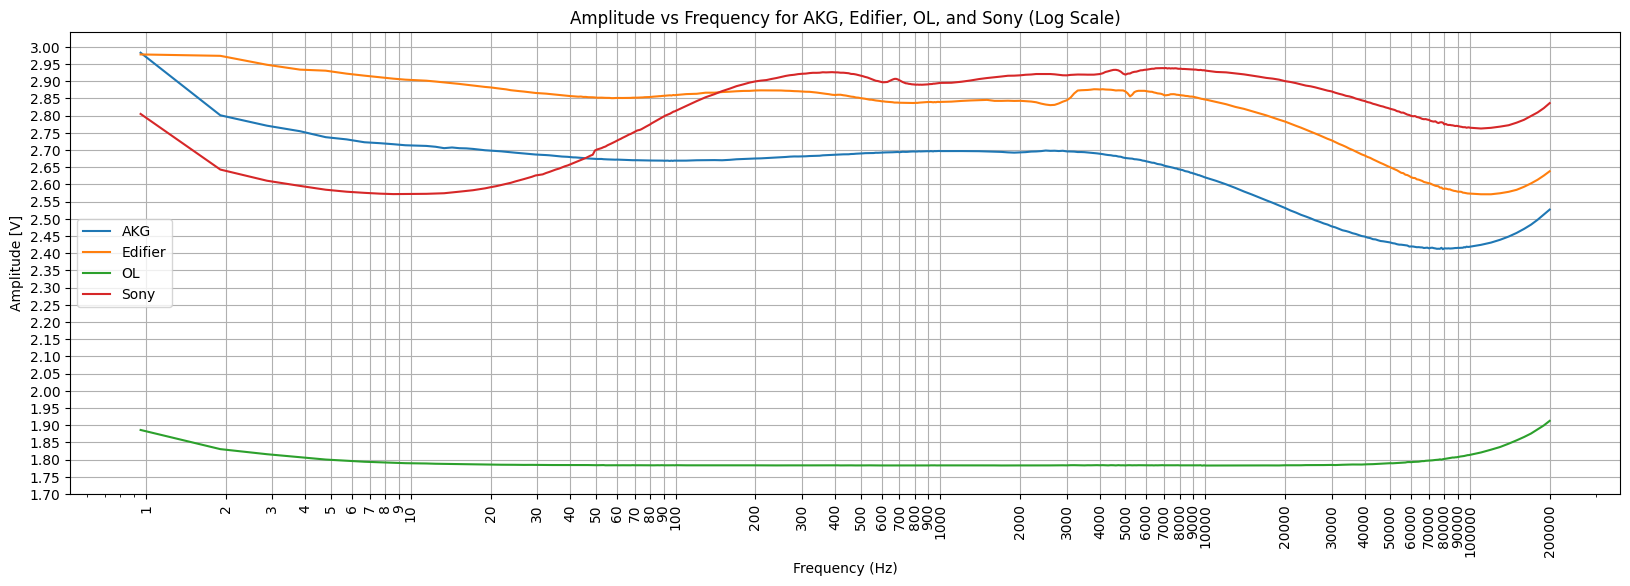

In [6]:
# @title
plot_single_metric(
    frequency_data = ol_df['Frequency'],
    data_series_list=[akg_df['Amplitude'], edifier_df['Amplitude'], ol_df['Amplitude'], sony_df['Amplitude']],
    labels=['AKG', 'Edifier', 'OL', 'Sony'],
    title='Amplitude vs Frequency for AKG, Edifier, OL, and Sony (Log Scale)',
    ylabel='Amplitude [V]',
    # y_lim=(1.70, 3.0), # Based on the original plot's y-limit
    y_ticks=np.arange(1.70, 3.01, 0.05) # Based on the original plot's y-ticks
)


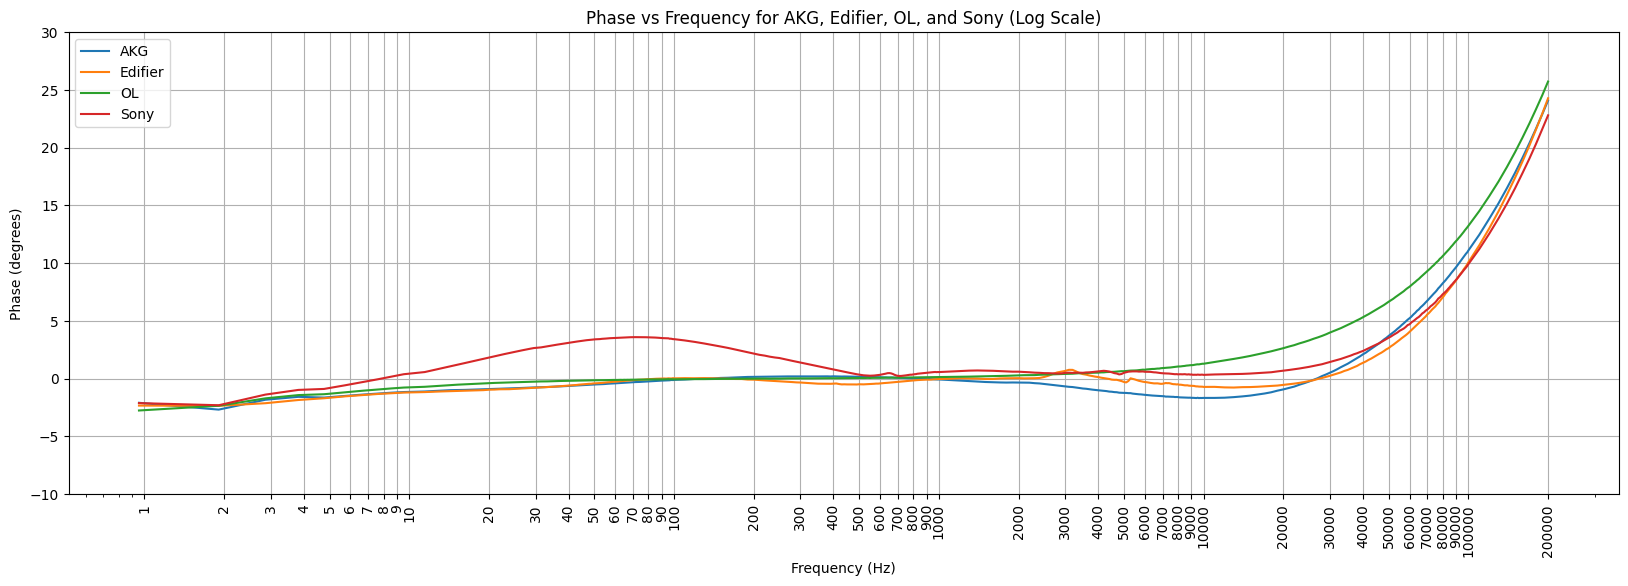

In [7]:
# @title
plot_single_metric(
    frequency_data = ol_df['Frequency'],
    data_series_list=[akg_df['Phase'], edifier_df['Phase'], ol_df['Phase'], sony_df['Phase']],
    labels=['AKG', 'Edifier', 'OL', 'Sony'],
    title='Phase vs Frequency for AKG, Edifier, OL, and Sony (Log Scale)',
    ylabel='Phase (degrees)',
    y_lim=(-10, 30), # Based on the original plot's y-limit
    y_ticks=np.arange(-10, 31, 5) # Based on the original plot's y-ticks
)

In [8]:
# @title

akg_ol_amplitude_diff = akg_df['Amplitude'] - ol_df['Amplitude']
edifier_ol_amplitude_diff = edifier_df['Amplitude'] - ol_df['Amplitude']
sony_ol_amplitude_diff = sony_df['Amplitude'] - ol_df['Amplitude']

akg_ol_phase_diff = akg_df['Phase'] - ol_df['Phase']
edifier_ol_phase_diff = edifier_df['Phase'] - ol_df['Phase']
sony_ol_phase_diff = sony_df['Phase'] - ol_df['Phase']

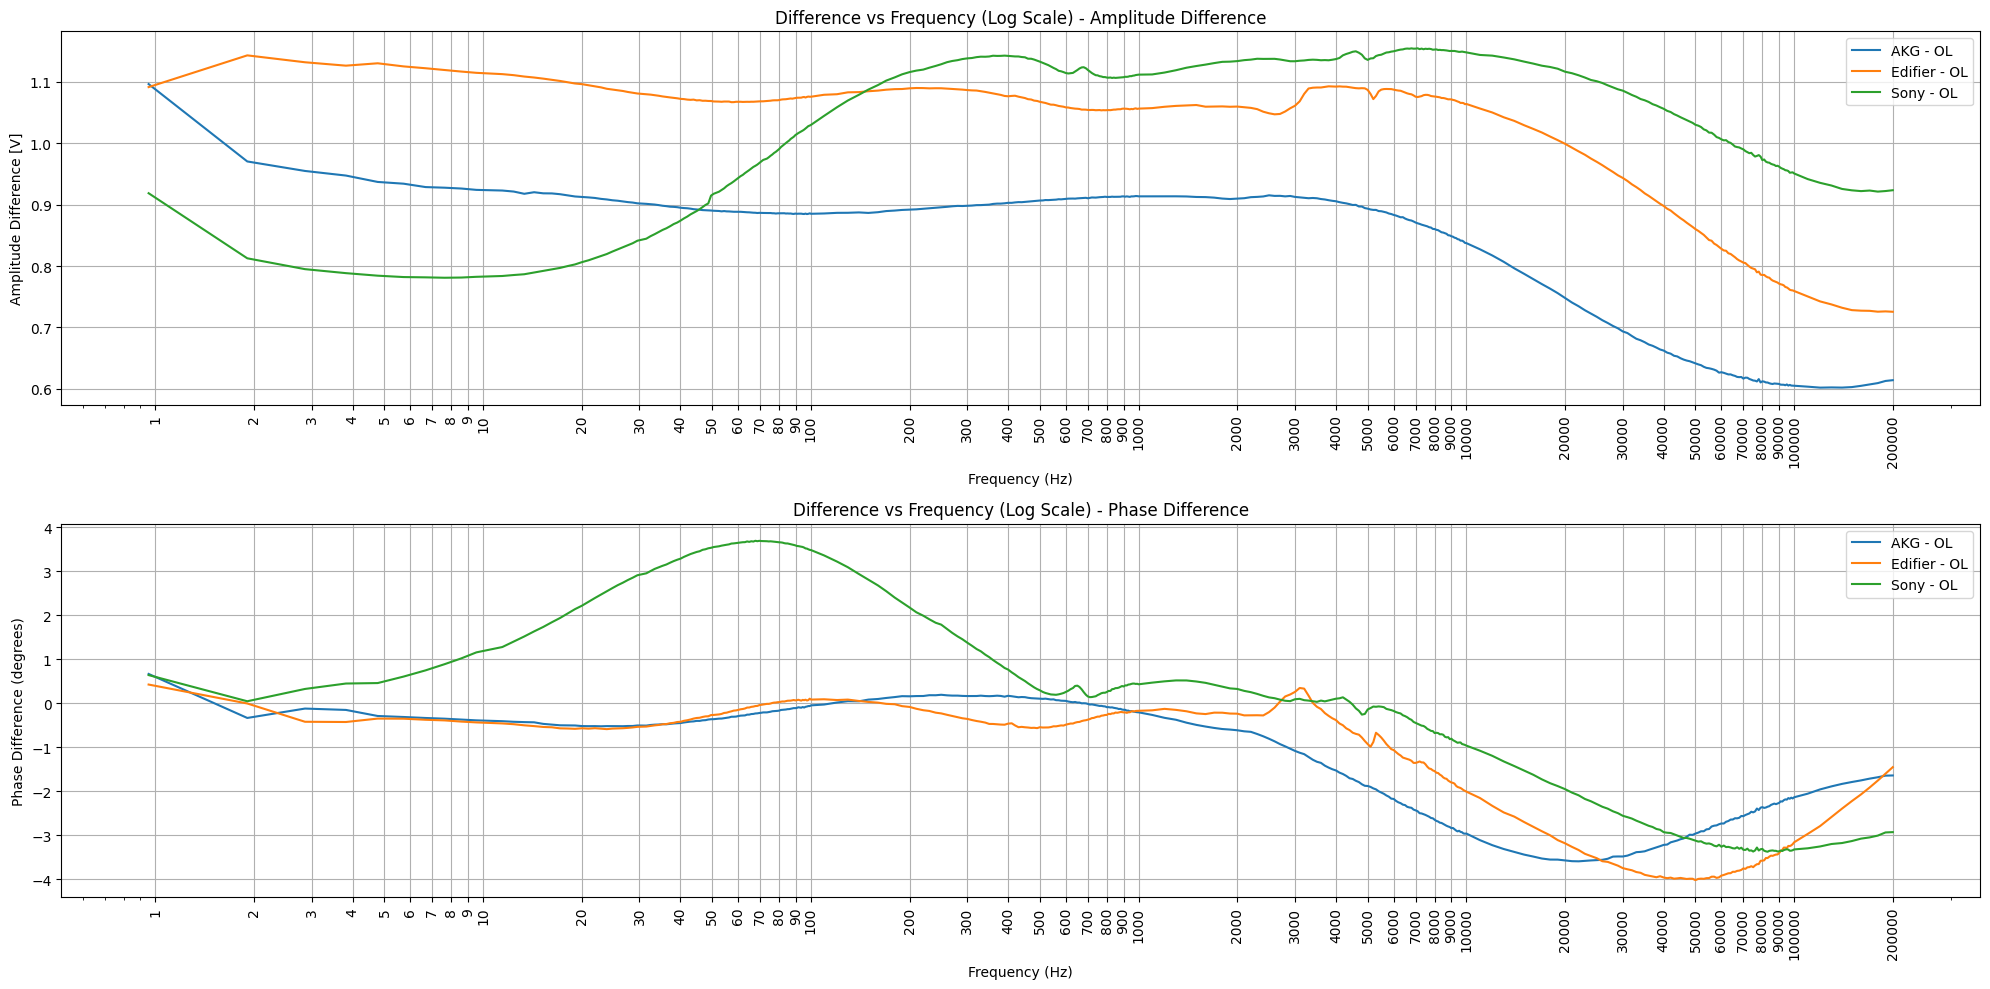

In [9]:
# @title
plot_difference_metrics(
    frequency_data = akg_df['Frequency'],
    amp_diff_series_list=[akg_ol_amplitude_diff, edifier_ol_amplitude_diff, sony_ol_amplitude_diff],
    phase_diff_series_list=[akg_ol_phase_diff, edifier_ol_phase_diff, sony_ol_phase_diff],
    labels=['AKG - OL', 'Edifier - OL', 'Sony - OL'],
    title_prefix='Difference vs Frequency (Log Scale)', # Shared title prefix
    y_amp_label='Amplitude Difference [V]',
    y_phase_label='Phase Difference (degrees)'
)

In [10]:
# @title
def plot_difference_combined(frequency_data, amp_series_list, phase_series_list, labels, title_prefix, y_amp_label, y_phase_label):
    """
    Generates a single plot with amplitude and phase differences against frequency,
    using a secondary y-axis for phase.

    Args:
        frequency_data (pandas Series): A pandas Series representing the frequency data.
        amp_diff_series_list (list): A list of pandas Series for amplitude differences.
        phase_diff_series_list (list): A list of pandas Series for phase differences.
        labels (list): A list of strings for the legend labels, corresponding to the series lists.
        title_prefix (str): A prefix for the main title of the figure.
        y_amp_label (str): The label for the amplitude difference y-axis.
        y_phase_label (str): The label for the phase difference y-axis.
    """
    fig, ax1 = plt.subplots(figsize=(20, 6)) # Create a figure and the first y-axis

    # Plot Amplitude Differences on the left y-axis
    for i, series in enumerate(amp_series_list):
        ax1.plot(frequency_data, series.values, label=f'{labels[i]} (Amplitude)', color=f'C{i}') # Use color cycle, distinguish with label

    ax1.set_xlabel('Frequency (Hz)')
    ax1.set_ylabel(y_amp_label, color='C0') # Match y-label color to the first plotted series color
    ax1.tick_params(axis='y', labelcolor='C0')

    ax1.set_xscale(x_scale)
    if x_ticks is not None:
        ax1.set_xticks(x_ticks)
        ax1.set_xticklabels(x_tick_labels, rotation='vertical')

    ax1.set_title(f'{title_prefix} - Amplitude and Phase Difference')
    ax1.grid(True)

    # Create a secondary y-axis for Phase Differences
    ax2 = ax1.twinx()
    for i, series in enumerate(phase_series_list):
         ax2.plot(frequency_data, series.values, label=f'{labels[i]} (Phase)', color=f'C{i}', linestyle='--') # Use dashed line for phase

    ax2.set_ylabel(y_phase_label, color='C1') # Match y-label color to the second plotted series color
    ax2.tick_params(axis='y', labelcolor='C1')

    # Combine legends from both axes
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right') # Place combined legend

    plt.show()

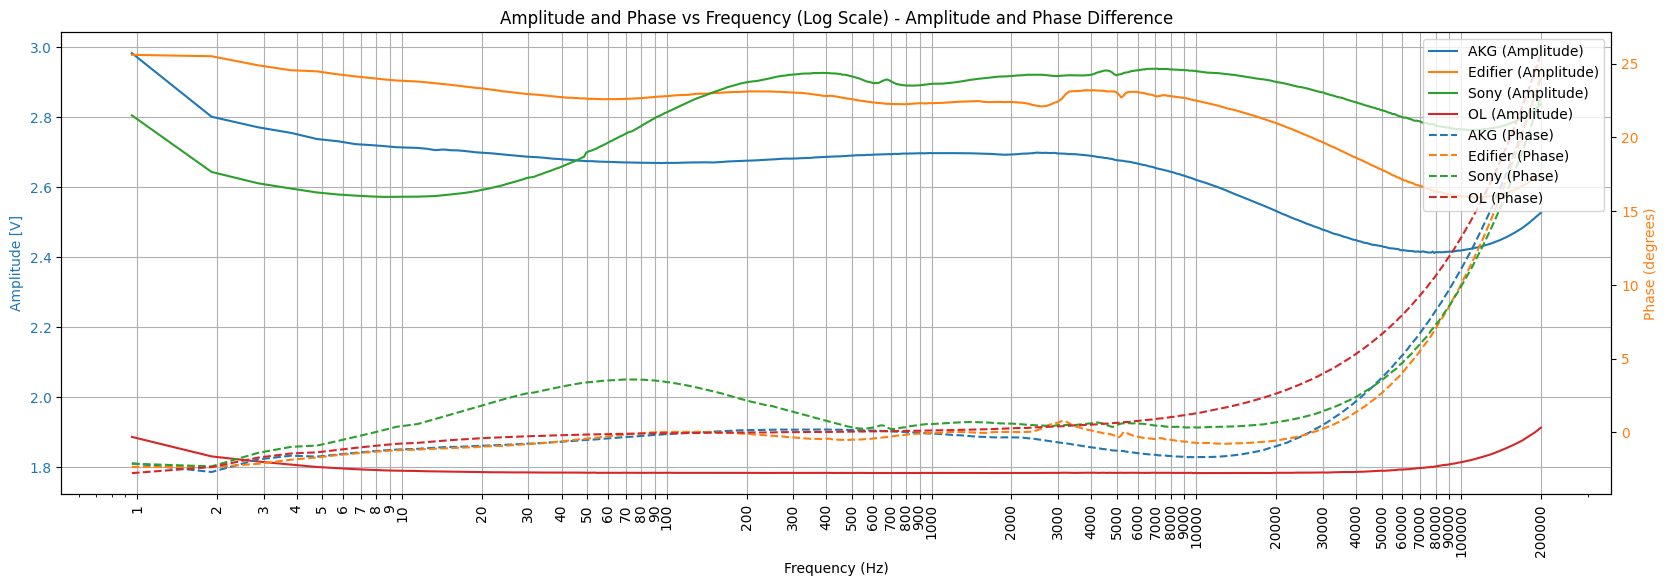

In [11]:
# @title
plot_difference_combined(
    frequency_data = akg_df['Frequency'],
    amp_series_list=[akg_df['Amplitude'], edifier_df['Amplitude'], sony_df['Amplitude'],ol_df['Amplitude']],
    phase_series_list=[akg_df['Phase'], edifier_df['Phase'], sony_df['Phase'], ol_df['Phase']],
    labels=['AKG', 'Edifier', 'Sony', 'OL'],
    title_prefix='Amplitude and Phase vs Frequency (Log Scale)',
    y_amp_label='Amplitude [V]',
    y_phase_label='Phase (degrees)'
)

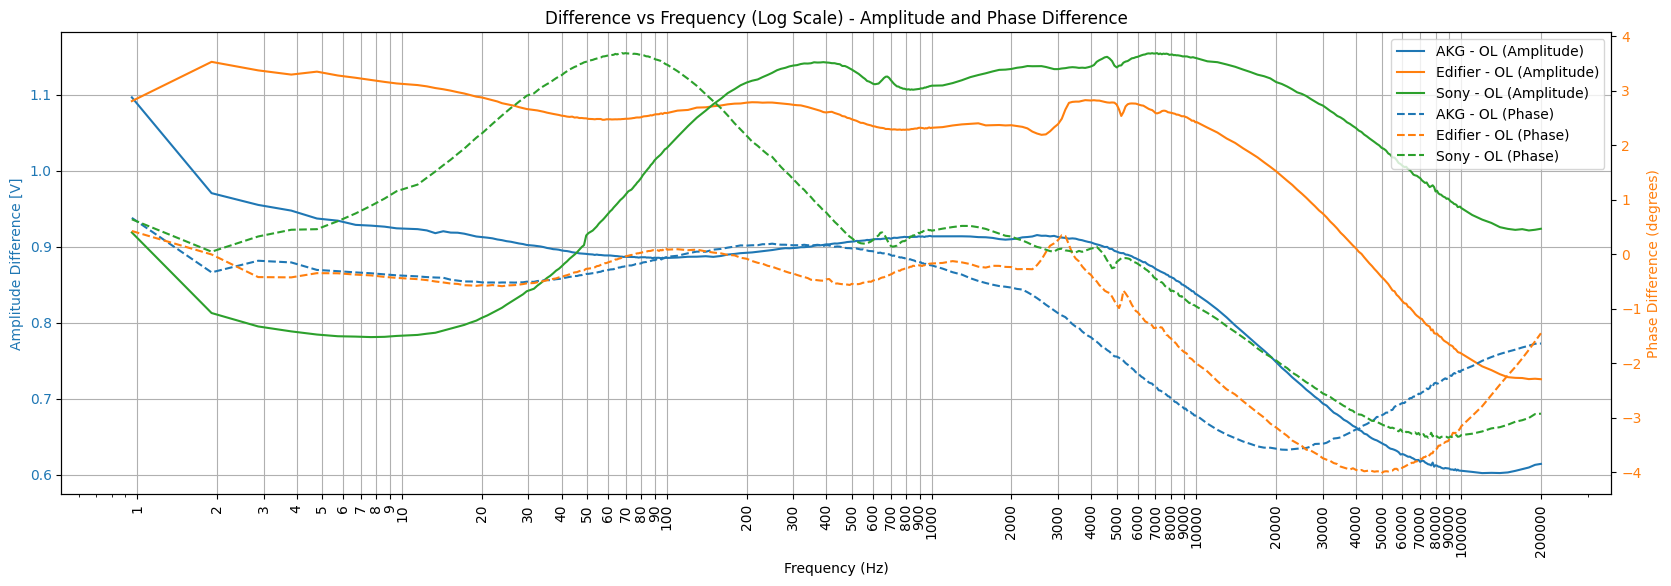

In [12]:
# @title
plot_difference_combined(
     frequency_data = akg_df['Frequency'],
     amp_series_list=[akg_ol_amplitude_diff, edifier_ol_amplitude_diff, sony_ol_amplitude_diff],
     phase_series_list=[akg_ol_phase_diff, edifier_ol_phase_diff, sony_ol_phase_diff],
     labels=['AKG - OL', 'Edifier - OL', 'Sony - OL'],
     title_prefix='Difference vs Frequency (Log Scale)',
     y_amp_label='Amplitude Difference [V]',
     y_phase_label='Phase Difference (degrees)'
)

# Task
Analyze the correlation between amplitude and phase differences of headphone measurements.

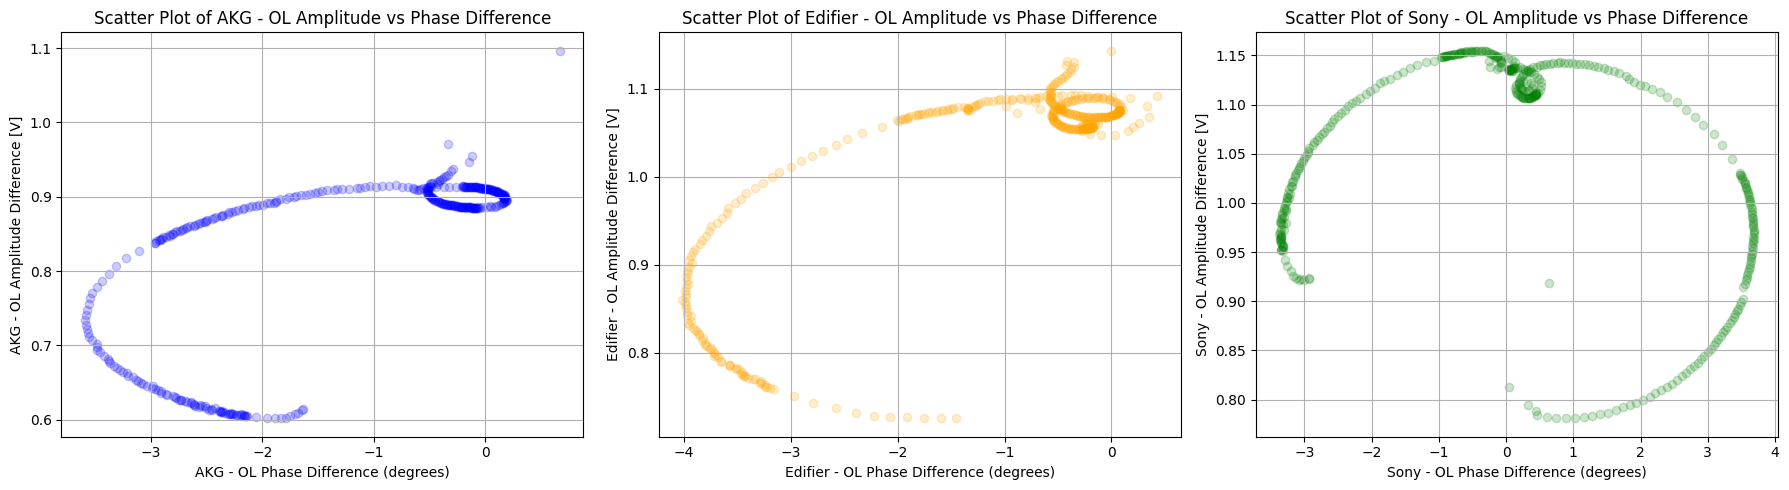

In [13]:
# @title
plt.figure(figsize=(18, 5))

# AKG - OL Scatter Plot
plt.subplot(1, 3, 1)
plt.scatter(akg_ol_phase_diff, akg_ol_amplitude_diff, alpha=0.2, color='blue')
plt.xlabel("AKG - OL Phase Difference (degrees)")
plt.ylabel("AKG - OL Amplitude Difference [V]")
plt.title("Scatter Plot of AKG - OL Amplitude vs Phase Difference")
plt.grid(True)

# Edifier - OL Scatter Plot
plt.subplot(1, 3, 2)
plt.scatter(edifier_ol_phase_diff, edifier_ol_amplitude_diff, alpha=0.2, color='orange')
plt.xlabel("Edifier - OL Phase Difference (degrees)")
plt.ylabel("Edifier - OL Amplitude Difference [V]")
plt.title("Scatter Plot of Edifier - OL Amplitude vs Phase Difference")
plt.grid(True)

# Sony - OL Scatter Plot
plt.subplot(1, 3, 3)
plt.scatter(sony_ol_phase_diff, sony_ol_amplitude_diff, alpha=0.2, color='green')
plt.xlabel("Sony - OL Phase Difference (degrees)")
plt.ylabel("Sony - OL Amplitude Difference [V]")
plt.title("Scatter Plot of Sony - OL Amplitude vs Phase Difference")
plt.grid(True)

plt.tight_layout()
plt.show()